# Get Satellite images

## Intro
- MDE
http://www.dsr.inpe.br/topodata/
http://www.webmapit.com.br/inpe/topodata/

    - http://www.dsr.inpe.br/topodata/data/geotiff/22S465ZN.zip
    - http://www.dsr.inpe.br/topodata/data/geotiff/22S48_ZN.zip
    - http://www.dsr.inpe.br/topodata/data/geotiff/23S48_ZN.zip
    - http://www.dsr.inpe.br/topodata/data/geotiff/23S465ZN.zip
## Summary

# Setup

In [5]:
import rasterio as rio
import rioxarray as rioxr


# Read and write

### From zip file


In [2]:
with rio.open('zip://../data/raster/SRTM/22S465ZN.zip!/22S465ZN.tif') as dataset:
    print(dataset.profile)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 5400, 'height': 3600, 'count': 1, 'crs': None, 'transform': Affine(0.0002777784814814818, 0.0, -46.5,
       0.0, -0.0002777777777777778, -22.0), 'blockysize': 1, 'tiled': False, 'interleave': 'band'}


### From url

Some servers require authentication before we can access the data. For this purpose we can explicitly create a backends.PydapDataStore and pass in a Requests session object. For example for HTTP Basic authentication:


In [3]:
"""import xarray as xr
import requests

session = requests.Session()
session.auth = ('username', 'password')

store = xr.backends.PydapDataStore.open('http://example.com/data',
                                        session=session)
ds = xr.open_dataset(store)"""


"import xarray as xr\nimport requests\n\nsession = requests.Session()\nsession.auth = ('username', 'password')\n\nstore = xr.backends.PydapDataStore.open('http://example.com/data',\n                                        session=session)\nds = xr.open_dataset(store)"

[Pydap’s cas module](https://www.pydap.org/en/latest/client.html#cas) has functions that generate custom sessions for servers that use CAS single sign-on. For example, to connect to servers that require NASA’s URS authentication:


In [4]:
"""import xarray as xr
from pydata.cas.urs import setup_session

ds_url = 'https://gpm1.gesdisc.eosdis.nasa.gov/opendap/hyrax/example.nc'

session = setup_session('username', 'password', check_url=ds_url)
store = xr.backends.PydapDataStore.open(ds_url, session=session)

ds = xr.open_dataset(store)"""

"import xarray as xr\nfrom pydata.cas.urs import setup_session\n\nds_url = 'https://gpm1.gesdisc.eosdis.nasa.gov/opendap/hyrax/example.nc'\n\nsession = setup_session('username', 'password', check_url=ds_url)\nstore = xr.backends.PydapDataStore.open(ds_url, session=session)\n\nds = xr.open_dataset(store)"

### zip file on the web


In [ ]:
url = 'zip+http://www.dsr.inpe.br/topodata/data/geotiff/22S465ZN.zip!/22S465ZN.tif'
with rio.open(url) as src: 
    print(src.width, src.height)

In [13]:
rioxr.open_rasterio(url)

<xarray.DataArray (band: 1, y: 3600, x: 5400)>
[19440000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 -46.5 -46.5 -46.5 -46.5 ... -45.0 -45.0 -45.0 -45.0
  * y            (y) float64 -22.0 -22.0 -22.0 -22.0 ... -23.0 -23.0 -23.0 -23.0
    spatial_ref  int32 0
Attributes:
    TIFFTAG_RESOLUTIONUNIT:  2 (pixels/inch)
    TIFFTAG_SOFTWARE:        IDRISI KILIMANJARO
    TIFFTAG_XRESOLUTION:     87.699997
    TIFFTAG_YRESOLUTION:     87.699997
    scale_factor:            1.0
    add_offset:              0.0

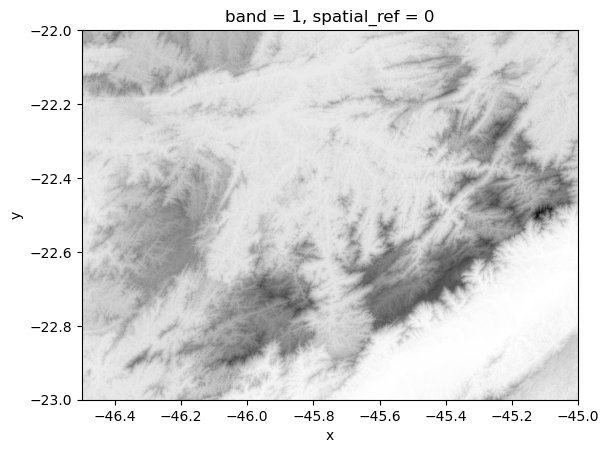

In [6]:
url = 'zip+http://www.dsr.inpe.br/topodata/data/geotiff/22S465ZN.zip!/22S465ZN.tif'
ds = rioxr.open_rasterio(url).squeeze()
img = ds.plot(cmap="Greys", add_colorbar=False)

In [7]:
ds.rio.write_crs('epsg:4326', inplace = True)



<xarray.DataArray (y: 3600, x: 5400)>
[19440000 values with dtype=float32]
Coordinates:
    band         int32 1
  * x            (x) float64 -46.5 -46.5 -46.5 -46.5 ... -45.0 -45.0 -45.0 -45.0
  * y            (y) float64 -22.0 -22.0 -22.0 -22.0 ... -23.0 -23.0 -23.0 -23.0
    spatial_ref  int32 0
Attributes:
    TIFFTAG_RESOLUTIONUNIT:  2 (pixels/inch)
    TIFFTAG_SOFTWARE:        IDRISI KILIMANJARO
    TIFFTAG_XRESOLUTION:     87.699997
    TIFFTAG_YRESOLUTION:     87.699997
    scale_factor:            1.0
    add_offset:              0.0